## Importing Libs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

In [2]:
import astropy.constants as ac
import astropy.units as u
from astropy.timeseries import BoxLeastSquares
from astropy.timeseries import LombScargle
from astropy.utils.data import get_pkg_data_filename 
from astropy.timeseries import TimeSeries

In [3]:
%matplotlib inline

# From TESS fits file

## Getting Data

In [4]:
#importing the LC fits file
filename = get_pkg_data_filename('V453_tess-0150-s_lc.fits')

#reading the LC fits file
ts = TimeSeries.read(filename, format='tess.fits')
ts

C:\Users\HP\anaconda3\lib\site-packages\astropy\timeseries\io\kepler.py:77: UserWarning: Ignoring 683 rows with NaN times
  warnings.warn('Ignoring {} rows with NaN times'.format(np.sum(nans)))


time,timecorr,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,d,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2019-07-18T20:26:12.443,3.1863044e-03,328243,nan,nan,nan,nan,nan,nan,10101000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-07-18T20:28:12.445,3.1863288e-03,328244,nan,nan,nan,nan,nan,nan,100000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-07-18T20:30:12.447,3.1863535e-03,328245,nan,nan,nan,nan,nan,nan,100000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-07-18T20:32:12.449,3.1863779e-03,328246,nan,nan,nan,nan,nan,nan,100000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-07-18T20:34:12.451,3.1864026e-03,328247,9.1018320e+04,3.4648163e+01,7.4997104e+03,8.7190857e+00,9.6484500e+04,3.8198124e+01,1000000000,nan,nan,nan,nan,1316.77173,3.1564070e-04,1168.62395,2.9564858e-04,2.0601206e-02,2.9553257e-02
2019-07-18T20:36:12.454,3.1864271e-03,328248,9.0926672e+04,3.4620403e+01,7.4847656e+03,8.7071457e+00,9.6368023e+04,3.8167519e+01,0,nan,nan,nan,nan,1316.77086,3.1594635e-04,1168.62611,2.9559332e-04,1.9506356e-02,3.2123599e-02
2019-07-18T20:38:12.456,3.1864517e-03,328249,9.1010039e+04,3.4633743e+01,7.4859092e+03,8.7123699e+00,9.6453539e+04,3.8182228e+01,0,nan,nan,nan,nan,1316.77432,3.1533957e-04,1168.62657,2.9552990e-04,2.4319679e-02,3.1764492e-02
2019-07-18T20:40:12.458,3.1864762e-03,328250,9.0947391e+04,3.4624683e+01,7.4962168e+03,8.7177973e+00,9.6375117e+04,3.8172234e+01,0,nan,nan,nan,nan,1316.77409,3.1561169e-04,1168.62948,2.9561773e-04,2.3759937e-02,3.6162637e-02


Text(0, 0.5, 'SAP Flux (e-/s)')

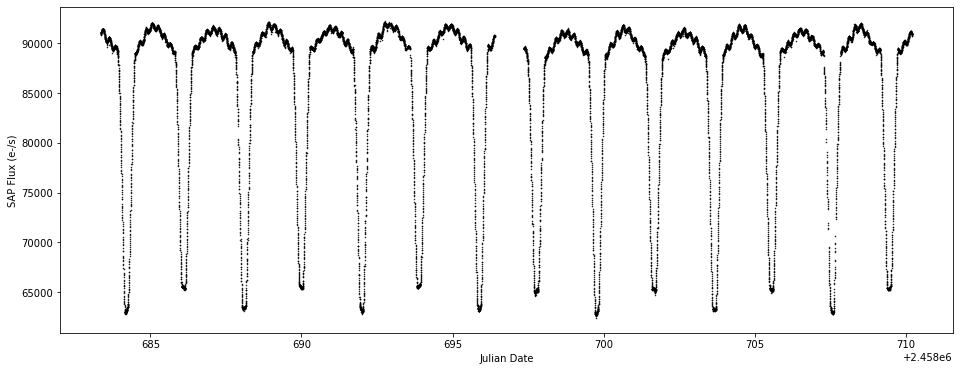

In [5]:
plt.figure(figsize=(16,6))
plt.plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1)
plt.xlabel('Julian Date')
plt.ylabel('SAP Flux (e-/s)')

Text(0, 0.5, 'SAP Flux (e-/s)')

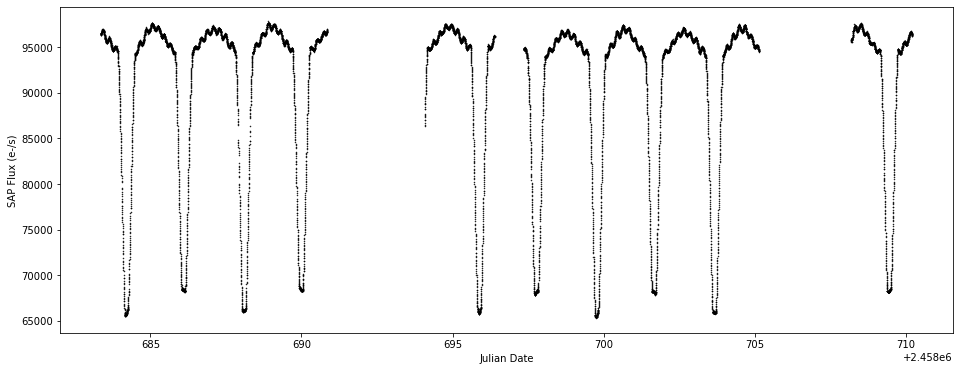

In [6]:
plt.figure(figsize=(16,6))
plt.plot(ts.time.jd, ts['pdcsap_flux'], 'k.', markersize=1)
plt.xlabel('Julian Date')
plt.ylabel('SAP Flux (e-/s)')

## Finding period

In [7]:
p_bls = BoxLeastSquares.from_timeseries(ts, 'pdcsap_flux',uncertainty='pdcsap_flux_err')

results_bls = p_bls.autopower(duration=0.5, minimum_period=2, maximum_period=15, minimum_n_transit=3, objective='likelihood', oversample=20)  
best_bls = np.argmax(results_bls.power)  
period_bls = results_bls.period[best_bls]
transit_time_bls = results_bls.transit_time[best_bls] 
results_bls.period

<Quantity [ 2.        ,  2.00277804,  2.0055638 ,  2.00835733,  2.01115865,
            2.01396779,  2.0167848 ,  2.01960969,  2.02244251,  2.02528329,
            2.02813206,  2.03098885,  2.0338537 ,  2.03672665,  2.03960773,
            2.04249696,  2.0453944 ,  2.04830007,  2.051214  ,  2.05413624,
            2.05706681,  2.06000576,  2.06295312,  2.06590893,  2.06887321,
            2.07184602,  2.07482738,  2.07781734,  2.08081592,  2.08382317,
            2.08683913,  2.08986383,  2.09289731,  2.09593961,  2.09899076,
            2.10205082,  2.10511981,  2.10819777,  2.11128475,  2.11438078,
            2.1174859 ,  2.12060016,  2.12372359,  2.12685624,  2.12999814,
            2.13314934,  2.13630987,  2.13947979,  2.14265912,  2.14584792,
            2.14904623,  2.15225408,  2.15547153,  2.15869861,  2.16193536,
            2.16518184,  2.16843808,  2.17170413,  2.17498004,  2.17826584,
            2.18156158,  2.18486732,  2.18818308,  2.19150893,  2.1948449 ,
            

In [8]:
#time = ts.time.jd - 2451545 # 12:00 UT (noon) on January 1, 2000, was 2 451 545
time = ts.time.jd - ts.time.jd[0]
flux = ts['pdcsap_flux']
flux_err = ts['pdcsap_flux_err']

In [9]:
sel_nan = np.isnan(flux)
time = time[~sel_nan]
flux = flux[~sel_nan]
flux_err = flux_err[~sel_nan]
model = BoxLeastSquares(time, flux, flux_err) # ~ is the unary Not operator
pg = model.autopower(0.2)

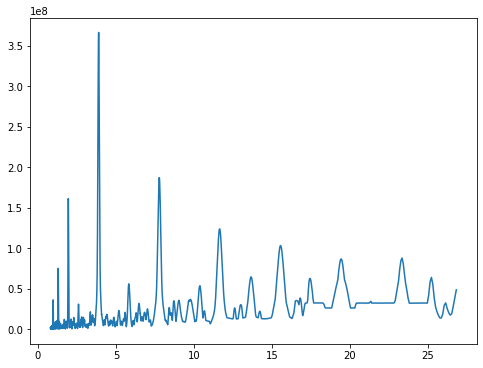

In [10]:
periods = 2*pg.period
power = pg.power

plt.figure(figsize=(8,6))
plt.plot(periods, power)

Text(0, 0.5, 'PDCSAP Flux [e/s]')

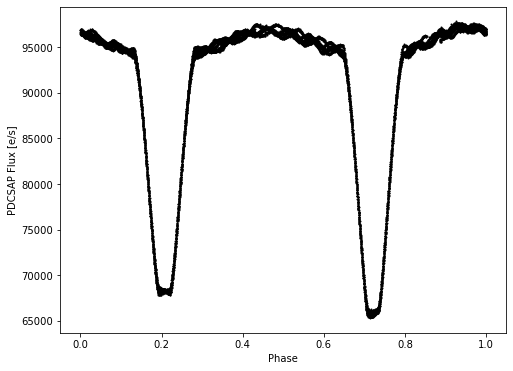

In [35]:
best_period = periods[np.argmax(power)]
# Plot the Phase-Folded Light curve for the Exoplant Transit using the Period found.

# The added phase to the time is just to center the transit.
phase = np.remainder(time+best_period/2, best_period)/best_period 

plt.figure(figsize=(8,6))
plt.scatter(phase, flux, s=1, color='k')
plt.xlabel("Phase")
plt.ylabel("PDCSAP Flux [e/s]")

In [36]:
from astropy.stats import sigma_clipped_stats
mean, median, stddev = sigma_clipped_stats(flux)  
flux_norm = flux / median

Text(0, 0.5, 'Normalised Flux')

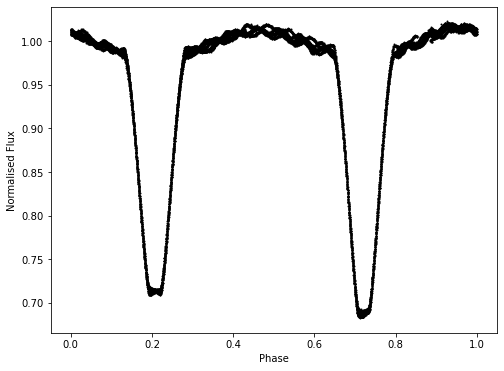

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(phase, flux_norm, s=1, color='k')
plt.xlabel("Phase")
plt.ylabel("Normalised Flux")

## Fitting

In [12]:
from scipy.optimize import curve_fit as cf

###  Neev's Eclipse code

In [13]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c

def lightcurve(m1,m2,R1,R2,t1,t2,a,e,i,w,sigma,m):
    
    m1=m1*u.M_sun
    m2=m2*u.M_sun
    R1=R1*u.R_sun
    R2=R2*u.R_sun
    t1=t1*u.K
    t2=t2*u.K
    a=a*u.R_sun
    
    def circleintersection(x1,y1,R1,x2,y2,R2):
        d=np.sqrt((x1-x2)**2+(y1-y2)**2)
        intersect=np.zeros(len(d))*u.au*u.au
        for i in range(len(d)):

            if d[i]>=R1[i]+R2[i]:
                intersect[i]=0*u.au*u.au
            elif d[i]<=np.abs(R1[i]-R2[i]):
                if R1[i]<=R2[i]:
                    intersect[i]=np.pi*R1[i]**2
                else:
                    intersect[i]=np.pi*R2[i]**2
            else:
                A1=R2[i]**2*(np.arccos((d[i]**2+R2[i]**2-R1[i]**2)/(2*d[i]*R2[i]))).value
                A2=R1[i]**2*(np.arccos((d[i]**2+R1[i]**2-R2[i]**2)/(2*d[i]*R1[i]))).value
                A3=-(1/2)*np.sqrt((-d[i]+R2[i]-R1[i])*(-d[i]-R2[i]+R1[i])*(-d[i]+R2[i]+R1[i])*(d[i]+R2[i]+R1[i]))
                A=A1+A2+A3
                intersect[i]=A
        return intersect

    i=i*np.pi/180
    w=w*np.pi/180
    sigma=sigma*np.pi/180

    a1=m2*a/(m1+m2)
    a2=m1*a/(m1+m2)
    theta=np.linspace(0,2*np.pi,m)
    r1=a1*(1-e**2)/(1+e*np.cos(theta))
    r2=a2*(1-e**2)/(1+e*np.cos(theta))
    x1=a1*e+r1*np.cos(theta)
    y1=r1*np.sin(theta)
    x2=-(a2*e+r2*np.cos(theta))
    y2=-(r2*np.sin(theta))
    P=2*np.pi*np.sqrt(a**3/(c.G*(m1+m2))).to('day')

    xapp1=x1*(-np.cos(i)*np.sin(sigma)*np.sin(w)+np.cos(sigma)*np.cos(w)) + y1*(-np.cos(i)*np.sin(sigma)*np.cos(w)-np.cos(sigma)*np.sin(w))
    xapp2=x2*(-np.cos(i)*np.sin(sigma)*np.sin(w)+np.cos(sigma)*np.cos(w)) + y2*(-np.cos(i)*np.sin(sigma)*np.cos(w)-np.cos(sigma)*np.sin(w))
    yapp1=x1*(+np.cos(i)*np.cos(sigma)*np.sin(w)+np.sin(sigma)*np.cos(w)) + y1*(np.cos(i)*np.cos(sigma)*np.cos(w)-np.sin(sigma)*np.sin(w))
    yapp2=x2*(+np.cos(i)*np.cos(sigma)*np.sin(w)+np.sin(sigma)*np.cos(w)) + y2*(np.cos(i)*np.cos(sigma)*np.cos(w)-np.sin(sigma)*np.sin(w))

    xrel=xapp1-xapp2
    yrel=yapp1-yapp2
    R1=R1.to('au')
    R2=R2.to('au')
    intersect=circleintersection(xrel,yrel,R1*np.ones(len(xrel)),np.zeros(len(xrel))*u.au,np.zeros(len(xrel))*u.au,R2*np.ones(len(xapp2)))

    sb=c.sigma_sb
    f1=sb*np.pi*R1**2*t1**4
    f2=sb*np.pi*R2**2*t2**4

    thetacopy=np.copy(theta)
    thetacopy[thetacopy>np.pi]=thetacopy[thetacopy>np.pi]-2*np.pi
    phi=2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(thetacopy/2))
    t=(phi-e*np.sin(phi))*P/(2*np.pi)
    t[t<0]=t[t<0]+P
    t[-1]+=P

    flux=np.zeros(len(theta))*sb.unit*(R1**2).unit*(t1**4).unit

    for i in range(len(theta)):
        if np.pi-w<=theta[i]<2*np.pi-w:
            flux1=f1*(1-intersect[i]/(np.pi*R1**2))
            flux2=f2
            flux[i]=flux1+flux2
        else:
            flux2=f2*(1-intersect[i]/(np.pi*R2**2))
            flux1=f1
            flux[i]=flux1+flux2
    frel=flux/(f1+f2)

    plt.figure(figsize=(15,6))
    plt.plot(t/P,frel)
    plt.xlabel('Phase')
    plt.ylabel('Relative Flux')
    plt.title('Light Curve for an Eclipsing Binary System ')
    return t/P,frel, P

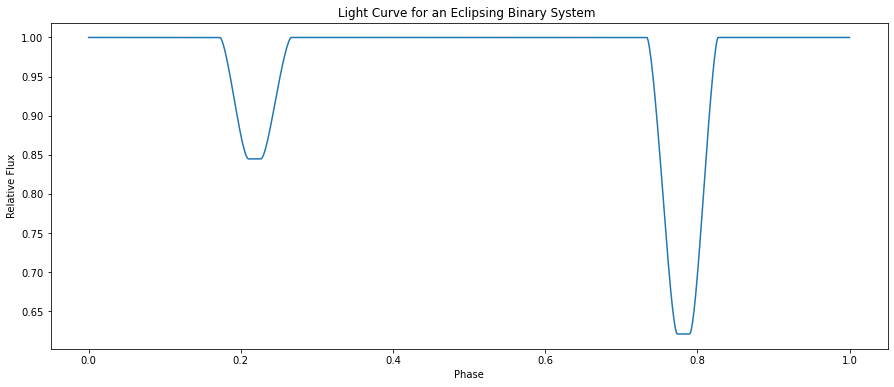

In [14]:
#Test Case

m1=1
m2=4
R1=1
R2=2
t1=5000
t2=4000
a=10
e=0.2
i=85
w=0
sigma=0
m=1000

x,y,P = lightcurve(m1, m2, R1, R2, t1, t2, a, e, i, w, sigma,m)

    

In [15]:
#guess

m1=15
m2=10
R1=10
R2=5
t1=25000
t2=24000
a=20
e=0.1
i=90
w=180
sigma=0
m=1000
g_init = [m1, m2, R1, R2, t1, t2, a, e, i, w, sigma, m]

In [17]:
popt, perr = cf(lightcurve, xdata = phase, ydata = flux, p0=g_init)

TypeError: lightcurve() takes 12 positional arguments but 13 were given

## New code

### Eclipsing Binary code

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as constants
from scipy.integrate import dblquad
from scipy.optimize import fsolve
#%matplotlib inline

pi=np.pi
def true2apparent(m1,m2,e,a,Omega,omega,i,f):
    '''
    Returns X,Y,Z coordinates of apparent orbit as seen on the plane of sky
            
            Parameters:
            m1 (float): Mass of primary star in Solar Mass units
            m2 (float): Mass of secondary star in Solar Mass units
            e (float): Eccentricity of the system. 0 < e < 1 for elliptical orbits
            a (float): Semi-major axis of system in Solar radius units
            Omega (float): Longitude of ascending node in degrees
            omega (float): Argument of perihilion in degreed
            i (float): Inclination of plane of orbit with respect to plane of sky in degrees
            theta(array_like): Array containing values of true anomalies of the system with focus at COM
            
            Returns:
            X1(array): Array containing X-coordinate for centre of primary star as projected in the plane of sky
            Y1(array): Array containing Y-coordinate for centre of primary star as projected in the plane of sky
            Z1(array): Array containing Z-coordinate for centre of primary star as projected in the plane of sky
            X2(array): Array containing X-coordinate for centre of secondary star as projected in the plane of sky
            Y2(array): Array containing Y-coordinate for centre of secondary star as projected in the plane of sky
            Z2(array): Array containing Z-coordinate for centre of secondary star as projected in the plane of sky
            d(array): Array containing Apparent distance between the two stars
            
    '''
    a1 = m2/(m1+m2)*a
    a2 = m1/(m1+m2)*a
    r1 = -a1*(1-e**2)/(1+e*np.cos(f))
    r2 =  a2*(1-e**2)/(1+e*np.cos(f))
    angle = omega+f
    X1 = r1*(np.cos(Omega)*np.cos(angle)-np.sin(Omega)*np.sin(angle)*np.cos(i))
    Y1 = r1*(np.sin(Omega)*np.cos(angle)-np.cos(Omega)*np.sin(angle)*np.cos(i))
    Z1 = r1*np.sin(angle)*np.sin(i)
    X2 = r2*(np.cos(Omega)*np.cos(angle)-np.sin(Omega)*np.sin(angle)*np.cos(i))
    Y2 = r2*(np.sin(Omega)*np.cos(angle)-np.cos(Omega)*np.sin(angle)*np.cos(i))
    Z2 = r2*np.sin(angle)*np.sin(i)
    d = ((X1-X2)**2+(Y1-Y2)**2)**0.5
    return X1,Y1,Z1,X2,Y2,Z2,d

def circle_intersection(x1,y1,r1,x2,y2,r2):                      #Finds intersection points of 2 circles only if they intersect
    d=np.sqrt((x1-x2)**2+(y1-y2)**2)
    delta=0.25*np.sqrt((d+r1+r2)*(d+r1-r2)*(d-r1+r2)*(-d+r1+r2))
    x3=(x1+x2)/2 + (x2-x1)*(r1**2-r2**2)/(2*d**2) +2*(y2-y1)*delta/d**2    
    x4=(x1+x2)/2 + (x2-x1)*(r1**2-r2**2)/(2*d**2) -2*(y2-y1)*delta/d**2
    y3=(y1+y2)/2 + (y2-y1)*(r1**2-r2**2)/(2*d**2) -2*(x1-x2)*delta/d**2
    y4=(y1+y2)/2 + (y2-y1)*(r1**2-r2**2)/(2*d**2) +2*(x1-x2)*delta/d**2
    return x3,y3,x4,y4


def check_intersection(x1,x2,y1,y2,R1,R2):
    '''
    Returns the status/type of intersection of the two stars
    
        Parameters:
        x1(float):x-coordinate of star 1
        x2(float):x-coordinate of star 2
        y1(float):y-coordinate of star 1
        y2(float):y-coordinate of star 2
        R1(float):radius of star 1
        R2(float):radius of star 2
        
        Returns:
        A number denoting the type of intersection
    '''    
    d=np.sqrt((x1-x2)**2 + (y1-y2)**2)
    if(d>=(R1+R2)):
        print("Stars do not eclipse each other")
    elif((R1+R2)>d and d>abs(R1-R2)):
        print("Stars partially eclipse each other")
    elif d<=abs(R1-R2):
        print("Stars eclipse each other and the eclipse is either annular or total")

def _func(E,phase,e):
    '''
    Used for solving the implicit equation (E-esinE=2*pi*phase) for appropriate values of phase
    
        Parameters:
        E(float): eccentric anomaly
        phase(float): orbit phase
        e(float): eccentricity
        
    '''
    return(E-e*np.sin(E)-2*np.pi*(phase))

def _phase_to_trueanomaly(phase,e):
    '''
    Returns the true anomaly array for the given array of phases
    
        Parameters:
        phase(array): orbit phase
        e(float): eccentricity
        
        Variables in function scope:
        E(float): eccentric anomaly
            
        Returns:
        f(array): true anomaly
    '''
    
    #time of periastron epoch(tau) is taken to be zero
    f=np.zeros(len(phase))   
    for i in range(len(phase)):
        E=fsolve(lambda E: _func(E,phase[i],e),0)
        f[i]=2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(0.5*E))   
    return f

def _trueanomaly_to_phase(f,e):
    '''
    Returns the phase array for the given array of true anomalies
    
        Parameters:
        e(float): eccentricity
        f(array): true anomaly
        
        Variables in function scope:
        E(float): eccentric anomaly
        
        Returns:
        phase(array): orbit phase
    '''
    phase=np.zeros(len(f))
    for i in range(len(f)):
        E=2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(0.5*f[i]))
        phase[i]=(1./(2*np.pi))*(E-e*np.sin(E)) 
        if (phase[i]<0):
            phase[i]+=1
    return phase

def _fractional_loss(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2):
    '''
    Returns the value of fractional loss of light due to eclipse and linear limb darkening.
            
            Parameters:
            f(array_like): Array containing values of true anomalies of the system with focus at COM
            L1 (float): Luminosity of the primary star in solar luminosity units
            L2 (float): Luminosity of the secondary star in solar luminosity units
            R1 (float): Radius of the primary star in solar radius units
            R2 (float): Radius of the secondary star in solar radius units
            m1 (float): Mass of primary star in Solar Mass units
            m2 (float): Mass of secondary star in Solar Mass units
            e (float): Eccentricity of the system. 0 < e < 1 for elliptical orbits
            a (float): Semi-major axis of system in AU
            Omega (float): Longitude of ascending node in degrees
            omega (float): Argument of perihilion in degreed
            i (float): Inclination of plane of orbit with respect to plane of sky in degrees
            u1(float): Limb Darkening coefficient for primary
            u2(float): Limb Darkening coeeficient for secondary
            
            Returns:
            f1(array): Array containing fractional loss of luminosity for primary
            f2(array): Array containing fractional loss of luminosity for secondary
    '''
    
    X1,Y1,Z1,X2,Y2,Z2,d = true2apparent(m1,m2,e,a,Omega,omega,i,f)
    #d = d.value
    #R1 = R1.value
    #R2 = R2.value
    s1 = (R1**2 - R2**2 + d**2)/(2*d)
    s2 = d-s1
    alpha_0_1 = np.zeros(len(f))
    alpha_1_1 = np.zeros(len(f))
    alpha_0_2 = np.zeros(len(f))
    alpha_1_2 = np.zeros(len(f))
    for i in range(len(f)):
        if d[i]>R1+R2 or d[i] == R1+R2:
            alpha_0_1[i] = 0
            alpha_1_1[i] = 0
            alpha_0_2[i] = 0
            alpha_0_2[i] = 0
        elif d[i]<R1+R2 and d[i]>abs(R1-R2):
            phi1 = 2*np.arccos((R1**2 + d[i]**2 - R2**2)/(2*d[i]*R1))
            phi2 = 2*np.arccos((R2**2 + d[i]**2 - R1**2)/(2*d[i]*R2))
            if Z1[i]<Z2[i]:
                alpha_0_1[i] = 0.5*(phi1-np.sin(phi1))*R1**2 + 0.5*(phi2-np.sin(phi2))*R2**2
                alpha_0_1[i] = alpha_0_1[i]/(np.pi*R1**2)
                alpha_1_1[i] = dblquad(lambda y,x: (R1**2-x**2-y**2)**0.5, s1[i], R1, lambda x: -(R1**2-x**2)**0.5, lambda x: (R1**2-x**2)**0.5)[0] + dblquad(lambda y,x: (R1**2-x**2-y**2)**0.5, d[i]-R2, s1[i], lambda x: -(R2**2-(d[i]-x)**2)**0.5, lambda x: (R2**2-(d[i]-x)**2)**0.5)[0]
                alpha_1_1[i] = alpha_1_1[i]/(np.pi*R1**3)
                
                alpha_0_2[i] = 0
                alpha_1_2[i] = 0
                
            else:
                alpha_0_2[i] = 0.5*(phi1-np.sin(phi1))*R1**2 + 0.5*(phi2-np.sin(phi2))*R2**2
                alpha_0_2[i] = alpha_0_2[i]/(np.pi*R2**2)
                alpha_1_2[i] = dblquad(lambda y,x: (R2**2-(d[i]-x)**2-y**2)**0.5, s1[i], R1, lambda x: -(R1**2-x**2)**0.5, lambda x: (R1**2-x**2)**0.5)[0]  + dblquad(lambda y,x: (R2**2-(d[i]-x)**2-y**2)**0.5, d[i]-R2, s1[i], lambda x: -(R2**2-(d[i]-x)**2)**0.5, lambda x: (R2**2-(d[i]-x)**2)**0.5)[0]
                alpha_1_2[i] = alpha_1_2[i]/(np.pi*R2**3)
                
                alpha_0_1[i] = 0 
                alpha_1_1[i] = 0
        elif d[i] == R1-R2:
            if Z1[i]<Z2[i]:
                
                k = R1/R2
                alpha_0_1[i] = k**2
                alpha_1_1[i] = 4*np.pi/3*(np.arcsin(k**0.5)+((4*k-3)*(2*k+1)(k-k**2)**0.5)/3)
                alpha_0_2[i] = 0
                alpha_1_2[i] = 0
              
        elif d[i]<abs(R1-R2):
            if Z1[i]>Z2[i]:
                alpha_0_1[i] = 0
                alpha_1_1[i] = 0
                alpha_0_2[i] = 1
                alpha_1_2[i] = 2/3
                
            else:
                alpha_0_1[i] = np.pi*R2**2/(np.pi*R1**2)
                alpha_1_1[i] = dblquad(lambda y,x: (R1**2-x**2-y**2)**0.5, d[i]-R2, d[i]+R2, lambda x: -(R2**2-(d[i]-x)**2)**0.5,lambda x: (R2**2-(d[i]-x)**2)**0.5)[0]/(np.pi*R1**3)
                
                alpha_0_2[i] = 0
                alpha_1_2[i] = 0
                
    f1 = 3*(1-u1)*alpha_0_1/(3-u1) + 3*u1*alpha_1_1/(3-u1)
    f2 = 3*(1-u1)*alpha_0_2/(3-u1) + 3*u1*alpha_1_2/(3-u1)
    return f1,f2

def _fractional_loss_2(x1,y1,R1,x2,y2,R2,mu1,mu2,rings):      #R1 should be greater than R2
    d=np.sqrt((x1-x2)**2+(y1-y2)**2)    # Distance between centres of the stars
    y2=y1
    x2=x1+d                              #This is just so that y-coordinate of both stars is the same                  
    theta=np.linspace(0,np.pi/2,rings)       # theta is angular distance from centre (0 corresponds to centre and pi/2 the outer rim)
    deltheta=theta[1]-theta[0]           # d(theta)
    r1=R1*np.sin(theta)      #Concentric Rings of radius=Rsin(theta)
    r2=R2*np.sin(theta)
    delr1=R1*np.cos(theta)*deltheta       #Differential radial element (dr)
    delr2=R2*np.cos(theta)*deltheta
    Flux1=(1-mu1*(1-np.cos(np.arcsin((r1/R1).value))))*2*pi*r1*delr1     #Contribution to Flux of each Ring ( Each ring gives contribution I(r)*2*pi*r*dr)
    Flux2=(1-mu2*(1-np.cos(np.arcsin((r2/R2).value))))*2*pi*r2*delr2
    F1=np.sum(Flux1)     #Total Flux due to all rings
    F2=np.sum(Flux2)
    
    if d>=R1+R2:      # Stars dont intersect
        return 0,0,0,0          
    elif d==0*u.R_sun:     # Centres of both Stars Coincide    ( So if larger star is behind contribution of rings in it from 0 to R2 is removed) 
        Flux1b=1-(np.sum(Flux1[r1>R2])/F1)    #When R1 is behind, contribution only from r>R2
        Flux2a=0                     #Flux1b means star1 is beind and 1a means its ahead
        Flux1a=0
        Flux2b=1
        return Flux1b,Flux2a,Flux1a,Flux2b
    elif d<=np.abs(R1-R2) and d!=0*u.R_sun :   # Star 2 enclosed entirely inside Star 1
        if d>=R2:               #This means star2 is entirely inside but it does not contain the centre of star1 in it
            rmax=d+R2           #Max radius for which Star 2 intersects rings of Star 1
            rmin=d-R2           #Min radius for which Star 2 intersects rings of Star 1
            r1inside=r1[(rmin<r1) & (r1<rmax)]     #Intersecting rings
            x3,y3,x4,y4=circle_intersection(x1,y1,r1inside,x2,y2,R2)     #Finding Intersection Points of each ring with Star 2
            vec1x=x3-x1                   
            vec1y=y3-y1                           #The angle between the vectors gives what portion of rings are blocked
            vec2x=x4-x1
            vec2y=y4-y1
            dot=vec1x*vec2x+vec1y*vec2y         #dot product
            norm1=np.sqrt(vec1x**2+vec1y**2)
            norm2=np.sqrt(vec2x**2+vec2y**2)
            angle=(np.arccos(dot/(norm1*norm2))).value   #Angle Subtended by Intersecting Points
            S1=Flux1
            S1[(rmin<r1) & (r1<rmax)]=S1[(rmin<r1) & (r1<rmax)]*(2*pi-angle)/(2*pi)    #Removing contribution by the Intersecting Rings ( 'angle' is the blocked part)
            Flux1b=1-(np.sum(S1)/F1)  #Total contribution of Star 1
            Flux2a=0
            Flux1a=0
            Flux2b=1
            return Flux1b,Flux2a,Flux1a,Flux2b
        else:
            rmax=d+R2        #Now star2 also contains the centre of star1 so a few rings of 1 are completely blocked
            rmin=R2-d        #Radius till which rings are entirely blocked
            r1[r1<=rmin]=0*R1.unit    #entirely blocked so zero contribution
            r1inside=r1[(rmin<r1) & (r1<rmax)]             # Partially blocked rings
            x3,y3,x4,y4=circle_intersection(x1,y1,r1inside,x2,y2,R2)
            vec1x=x3-x1
            vec1y=y3-y1
            vec2x=x4-x1
            vec2y=y4-y1
            dot=vec1x*vec2x+vec1y*vec2y                #same as before, finds angle subtended by intersecting points but now the x coordinate of the intersection points may not lie between the centres of the circles,
                                                       #So if the x coordinate still lie in between the 2 circles, the blocked part is still given by angle, but suppose the x coordinate lies not between them but closer to star1 centre(further away from star 2 centre), then the angle given is of the visible region """
            norm1=np.sqrt(vec1x**2+vec1y**2)           #The above stuff is better visualized by drawing circles on Desmos
            norm2=np.sqrt(vec2x**2+vec2y**2)
            angle=(np.arccos(dot/(norm1*norm2))).value
            
            angle[~((min(x1,x2)<x3) & (max(x1,x2)>x3)) & (np.abs(x3-x1)<np.abs(x3-x2))]=2*pi-angle[~((min(x1,x2)<x3) & (max(x1,x2)>x3)) & (np.abs(x3-x1)<np.abs(x3-x2))]
            a=Flux1
            a[(rmin<r1) & (r1<rmax)]=a[(rmin<r1) & (r1<rmax)]*(2*pi-angle)/(2*pi)
            a[r1<rmin]=0*a.unit
            Flux1b=1-(np.sum(a)/F1)
            Flux2a=0
            Flux1a=0
            Flux2b=1
            return Flux1b,Flux2a,Flux1a,Flux2b
    else:                                       # Stars Partially Intersect
        Flux1a=0
        Flux2a=0
        if d>=R2:                       #Same as what was explained earlier
            r1min=d-R2
            r1inside=r1[r1min<r1]       #All rings till the outer rim are covered as this is only partial intersection of stars case
            x3,y3,x4,y4=circle_intersection(x1,y1,r1inside,x2,y2,R2)
            vec1x1=x3-x1
            vec1y1=y3-y1
            vec2x1=x4-x1
            vec2y1=y4-y1
            dot=vec1x1*vec2x1+vec1y1*vec2y1
            norm1=np.sqrt(vec1x1**2+vec1y1**2)
            norm2=np.sqrt(vec2x1**2+vec2y1**2)
            angle=(np.arccos(dot/(norm1*norm2))).value
            a=Flux1
            a[r1min<r1]=a[r1min<r1]*(2*pi-angle)/(2*pi)
            Flux1b=1-(np.sum(a)/F1)
        else:                          #Same as explained earlier
            rmin=R2-d
            r1[rmin>=r1]=0      
            r1inside=r1[r1>rmin]        #All rings till the outer rim are covered as this is only partial intersection of stars case
            x3,y3,x4,y4=circle_intersection(x1,y1,r1inside,x2,y2,R2)
            vec1x=x3-x1
            vec1y=y3-y1
            vec2x=x4-x1
            vec2y=y4-y1
            dot=vec1x*vec2x+vec1y*vec2y
            norm1=np.sqrt(vec1x**2+vec1y**2)
            norm2=np.sqrt(vec2x**2+vec2y**2)
            angle=(np.arccos(dot/(norm1*norm2))).value
            angle[~((min(x1,x2)<x3) & (max(x1,x2)>x3)) & (np.abs(x3-x1)<np.abs(x3-x2))]=2*pi-angle[~((min(x1,x2)<x3) & (max(x1,x2)>x3)) & (np.abs(x3-x1)<np.abs(x3-x2))]
            a=Flux1
            a[rmin<r1]=a[rmin<r1]*(2*pi-angle)/(2*pi)
            a[r1<rmin]=0*a.unit
            Flux1b=1-(np.sum(a)/F1)
        if d>=R1:                  # Same as discussed earlier but in this case Star 2 is blocked by 1 so everything done is with respect to centre of star 2 now, not star 1
            r2min=d-R1
            r2inside=r2[r2>r2min]
            x3,y3,x4,y4=circle_intersection(x1,y1,R1,x2,y2,r2inside)
            vec1x=x3-x2
            vec1y=y3-y2
            vec2x=x4-x2
            vec2y=y4-y2
            dot=vec1x*vec2x+vec1y*vec2y
            norm3=np.sqrt(vec1x**2+vec1y**2)
            norm4=np.sqrt(vec2x**2+vec2y**2)
            angle=(np.arccos(dot/(norm3*norm4))).value
            a2=Flux2
            a2[r2>r2min]=a2[r2>r2min]*(2*pi-angle)/(2*pi)
            Flux2b=1-(np.sum(a2)/F2)
        if d<R1:
            r2min=R1-d
            r2[r2<=r2min]=0*R1.unit
            r2inside=r2[r2>r2min]
            x3,y3,x4,y4=circle_intersection(x1,y1,R1,x2,y2,r2inside)
            vec1x=x3-x2
            vec1y=y3-y2
            vec2x=x4-x2
            vec2y=y4-y2
            dot=vec1x*vec2x+vec1y*vec2y
            norm3=np.sqrt(vec1x**2+vec1y**2)
            norm4=np.sqrt(vec2x**2+vec2y**2)
            angle=(np.arccos(dot/(norm3*norm4))).value
            angle[((min(x1,x2)<x3) & (max(x1,x2)>x3))]=2*pi-angle[((min(x1,x2)<x3) & (max(x1,x2)>x3))]
            a2=Flux2
            a2[r2>r2min]=a2[r2>r2min]*(angle)/(2*pi)
            a2[r2<=r2min]=0*a2.unit
            Flux2b=1-(np.sum(a2)/F2)
        return Flux1b,Flux2a,Flux1a,Flux2b
        
def _ld_lc(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2):
    '''
    Returns an array contaning the value of normalised flux as a function of phase with linear limb darkening effects
            
            Parameters:
            f(array_like): Array containing values of true anomalies of the system with focus at COM
            L1 (float): Luminosity of the primary star in solar luminosity units
            L2 (float): Luminosity of the secondary star in solar luminosity units
            R1 (float): Radius of the primary star in solar radius units
            R2 (float): Radius of the secondary star in solar radius units
            m1 (float): Mass of primary star in Solar Mass units
            m2 (float): Mass of secondary star in Solar Mass units
            e (float): Eccentricity of the system. 0 < e < 1 for elliptical orbits
            a (float): Semi-major axis of system in AU
            Omega (float): Longitude of ascending node in degrees
            omega (float): Argument of perihilion in degrees
            i (float): Inclination of plane of orbit with respect to plane of sky in degrees
            u1(float): Limb Darkening coefficient for primary
            u2(float): Limb Darkening coeeficient for secondary
            
            Returns:
            lc: Array containing values of L/L(total) as a function of phase 
    '''
    G = constants.G
    f1,f2 = _fractional_loss(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2)
    L = L1*(1-f1) + L2*(1-f2)
    lc = L/max(L)
    
    return lc
              
def _ld_lc2(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2,rings):
    
    X1,Y1,Z1,X2,Y2,Z2,d=true2apparent(m1,m2,e,a,Omega,omega,i,f)
    flux1=np.zeros(len(f))*u.W
    flux2=np.zeros(len(f))*u.W
    for i in range(len(f)):           
        if Z1[i]<Z2[i]:         #Region where Star2 is in front
            Flux1b,Flux2a,Flux1a,Flux2b=_fractional_loss_2(X1[i],Y1[i],R1,X2[i],Y2[i],R2,u1,u2,rings)
            flux1[i]=L1*(1-Flux1b)
            flux2[i]=L2*(1-Flux2a)
        else:                             #Region where Star 1 is in front
            Flux1b,Flux2a,Flux1a,Flux2b=_fractional_loss_2(X1[i],Y1[i],R1,X2[i],Y2[i],R2,u1,u2,rings)
            flux1[i]=L1*(1-Flux1a)
            flux2[i]=L2*(1-Flux2b)
    
    lc=(flux1+flux2)/(max(flux1)+max(flux2))
    return lc
              
def _no_limb_darkening(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i):
    lc = _ld_lc(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,0,0)
    return lc
              
def _limb_darkening(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2,approx = False):
    if approx:
        lc = _ld_lc2(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2,approx)
    else:
        lc = _ld_lc(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2)
    return lc
              
def lightcurve(phase,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1 = 0,u2 = 0, approx = None):
    
    #m1,m2=m1.to('M_sun'),m2.to('M_sun')
    #R1,R2,a=R1.to('R_sun'),R2.to('R_sun'),a.to('R_sun')
    #L1,L2=L1.to('L_sun'),L2.to('L_sun')
    
    #m1=m1.value
    #m2=m2.value
    #R1=R1.value
    #R2=R2.value
    #a=a.value
    #L1=L1.value
    #L2=L2.value
    
    i=np.deg2rad(i)
    Omega=np.deg2rad(Omega)
    omega=np.deg2rad(omega)
    
    f = _phase_to_trueanomaly(phase,e)
    if u1 == 0 and u2 == 0:
        return _no_limb_darkening(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i)
    elif 0<u1<=1 and 0<u2<=1:
        return _limb_darkening(f,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2,approx)
    else:
        print("u1 and u2 must be less than 1")
        raise SystemExit

### Testing the code

In [19]:
def Lum(R,T):
    L = 4*np.pi*(R.to('m')**2)*constants.sigma_sb*(T**4)
    return L/constants.L_sun

m1 = 1*u.M_sun  #solar radius units
m2 = 4*u.M_sun  #solar radius units
R1 = 1*u.R_sun  #Solar Mass units
R2 = 2*u.R_sun   #Solar Mass units
T1 = 5000*u.K
T2 = 4000*u.K
L1 = Lum(R1,T1)*u.L_sun   #solar luminosity units
L2 = Lum(R2,T2)*u.L_sun   #solar luminosity units
a = 5*u.R_sun 
e = 0.2 
omega = 180 #degrees
Omega = 0   #degrees
i = 85      #degrees
u1 = 0 
u2 = 0 
lc = lightcurve(phase,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2, approx = None)



plt.plot(phase, lc)
plt.xlim()

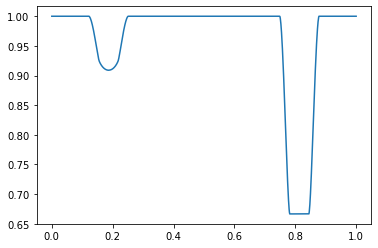

In [20]:
L1 = 2*u.L_sun   #solar luminosity units
L2 = 1*u.L_sun   #solar luminosity units
m1 = 2*u.M_sun  #solar radius units
m2 = 1*u.M_sun  #solar radius units
R1 = 3*u.R_sun  #Solar Mass units
R2 = 1*u.R_sun   #Solar Mass units 
a = 10*u.R_sun   #AU
e = 0.2 
omega = 0 #degrees
Omega = 0   #degrees
i = 90      #degrees
u1 = 0.6
u2 = 0.6
phase = np.linspace(0,1,1000) 
lc1 = lightcurve(phase,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2, 1000)

plt.plot(phase,lc1)

L1 = 50000    #solar luminosity units
L2 = 20000    #solar luminosity units
m1 = 15  #solar radius units
m2 = 10  #solar radius units
R1 = 10  #Solar Mass units
R2 = 5   #Solar Mass units 
a = 20   #AU
e = 0.1 
omega = 180 #degrees
Omega = 0   #degrees
i = 90      #degrees
u1 = 0.5 
u2 = 0.2

g_init = [phase, L1, L2, R1, R2, m1, m2, e, a, Omega, omega, i, u1, u2, approx = None]

print(phase.size)

m1 = 15 *u.M_sun  #solar radius units
m2 = 10 *u.M_sun  #solar radius units
R1 = 10 *u.R_sun  #Solar Mass units
R2 = 5 *u.R_sun   #Solar Mass units
T1 = 25000 *u.K
T2 = 24000 *u.K
L1 = Lum(R1,T1) *u.L_sun   #solar luminosity units
L2 = Lum(R2,T2) *u.L_sun   #solar luminosity units
a = 20 *u.R_sun 
e = 0.1 
omega = 180 #degrees
Omega = 0   #degrees
i = 90      #degrees
u1 = 0 
u2 = 0
g_init = [L1.value, L2.value, R1.value, R2.value, m1.value, m2.value, e, a.value, Omega, omega, i, u1, u2]
#lightcurve(phase,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2, 1000)

In [ ]:

#popt, perr = cf(lightcurve, xdata = phase, ydata = flux.value, p0=g_init)


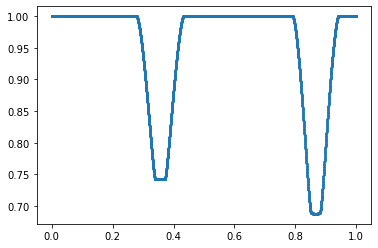

In [43]:
m1 = 14.36*u.M_sun  #solar radius units
m2 = 11.11*u.M_sun  #solar radius units
R1 = 8.551*u.R_sun  #Solar Mass units
R2 = 5.489*u.R_sun   #Solar Mass units
T1 = 26600 *u.K
T2 = 25500 *u.K
L1 = Lum(R1,T1) *u.L_sun   #solar luminosity units
L2 = Lum(R2,T2) *u.L_sun   #solar luminosity units
#L1 = (10**4.69) *u.L_sun
#L2 = (10**4.24) *u.L_sun
a = 30.59*u.R_sun   #AU
e = 0.022 
omega = 140.1 #degrees
Omega = 0   #degrees
i = 89      #degrees
u1 = 0.1
u2 = 0.1
#phase = np.linspace(0,1,100) 
lc1 = lightcurve(phase,L1,L2,R1,R2,m1,m2,e,a,Omega,omega,i,u1,u2, 1000)

plt.scatter(phase,lc1,s=1)

In [30]:
L1

<Quantity 32980.2571583 solLum>

Text(0, 0.5, 'Normalised Flux')

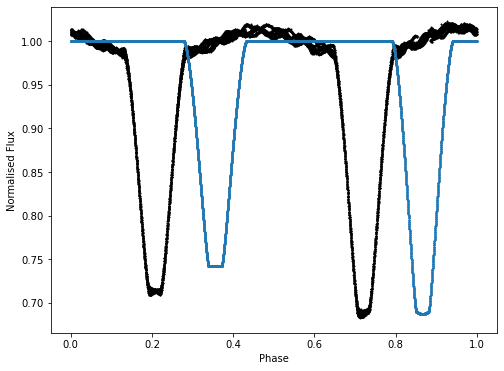

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(phase, flux_norm, s=1, color='k')
plt.scatter(phase,lc1,s=1)
plt.xlabel("Phase")
plt.ylabel("Normalised Flux")